In [2]:
# Loading and First Look

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the data set

df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv")

In [4]:
#Basic dataset information

df.shape


(102, 8)

In [5]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [6]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [7]:
# Data Quality Assessment

df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [8]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


In [9]:
# Check for duplicates

df.duplicated().sum()

np.int64(0)

In [10]:
# Basic statistics

df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


In [11]:
# Data Processing
df.columns=df.columns.str.strip()

In [12]:
#Convert Entry Column to Datatime

df['Entry_Date']=pd.to_datetime(df['Entry'],format='%b/%Y')
df['Entry_Year']=df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [13]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_Year,int32


In [14]:
# Create Valuation Growth Matric

df['Valuation_Growth']=df['Valuation ($B)']/df['Entry Valuation^^ ($B)'].shift(1)
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,NaN
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,2.400000
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,8.888889


In [15]:
#Extract Primary City(befor'/')

df['Primary_City']=df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,NaN,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,2.400000,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,8.888889,Noida


In [16]:
# Count number of Investors

df['Investor_Count']=df['Select Investors'].str.count(',')+1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,NaN,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,2.400000,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,8.888889,Noida,4


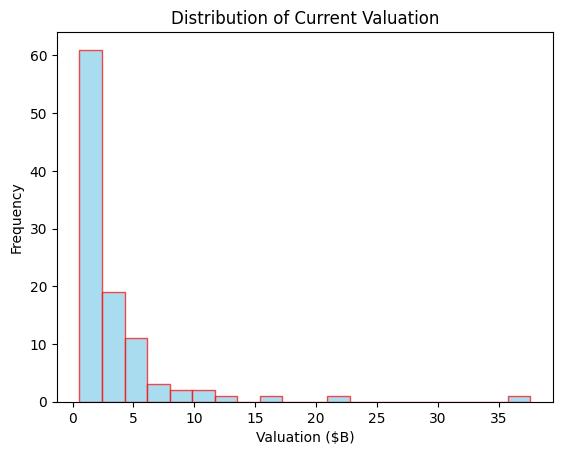

In [17]:
#Univariate Analysis

plt.hist(df['Valuation ($B)'],bins=20,alpha=0.7,color='skyblue',edgecolor='red')
plt.title('Distribution of Current Valuation')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

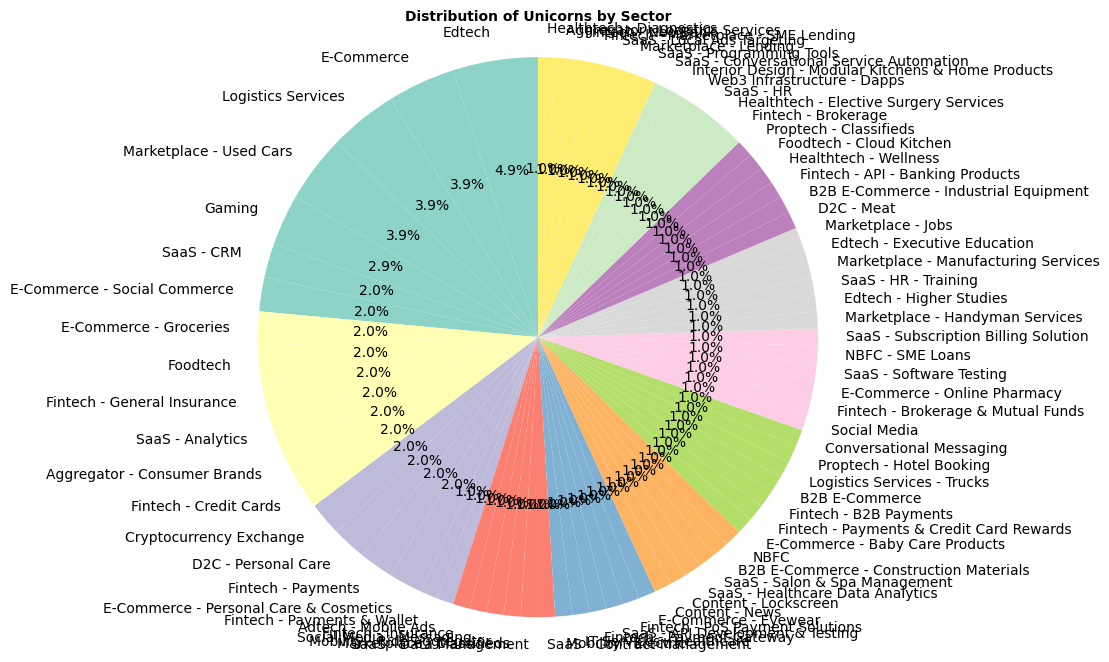

In [18]:
#Sector Distribution

plt.figure(figsize=(12,8))
sector_counts=df['Sector'].value_counts()
colors=plt.cm.Set3(np.linspace(0,1,len(sector_counts)))
plt.pie(sector_counts.values,labels=sector_counts.index,autopct='%1.1f%%',colors=colors,startangle=90)
plt.title('Distribution of Unicorns by Sector',fontsize=10,fontweight='bold')
plt.axis('equal')
plt.show()

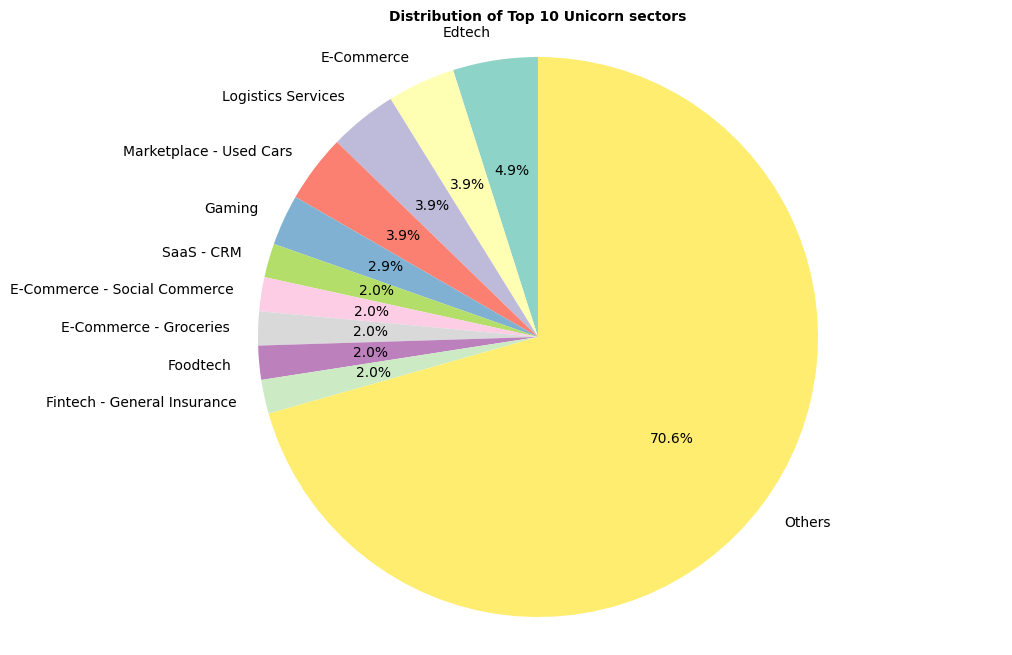

In [19]:
def display_top_k_sectors(df,k):
  sector_counts=df['Sector'].value_counts()

  # Select top K sectors and group the rest as 'Others'
  if k<len(sector_counts):
    top_sectors=sector_counts.head(k)
    other_sectors_count=sector_counts.iloc[k:].sum()
    top_sectors['Others']=other_sectors_count
  else:
    top_sectors=sector_counts

  plt.figure(figsize=(12,8))
  colors=plt.cm.Set3(np.linspace(0,1,len(top_sectors)))
  plt.pie(top_sectors.values,labels=top_sectors.index,autopct='%1.1f%%',colors=colors,startangle=90)
  plt.title(f'Distribution of Top {k} Unicorn sectors',fontsize=10,fontweight='bold')
  plt.axis('equal')
  plt.show()

# Call the function with K=5 to display top 5 Sectors
display_top_k_sectors(df,10)

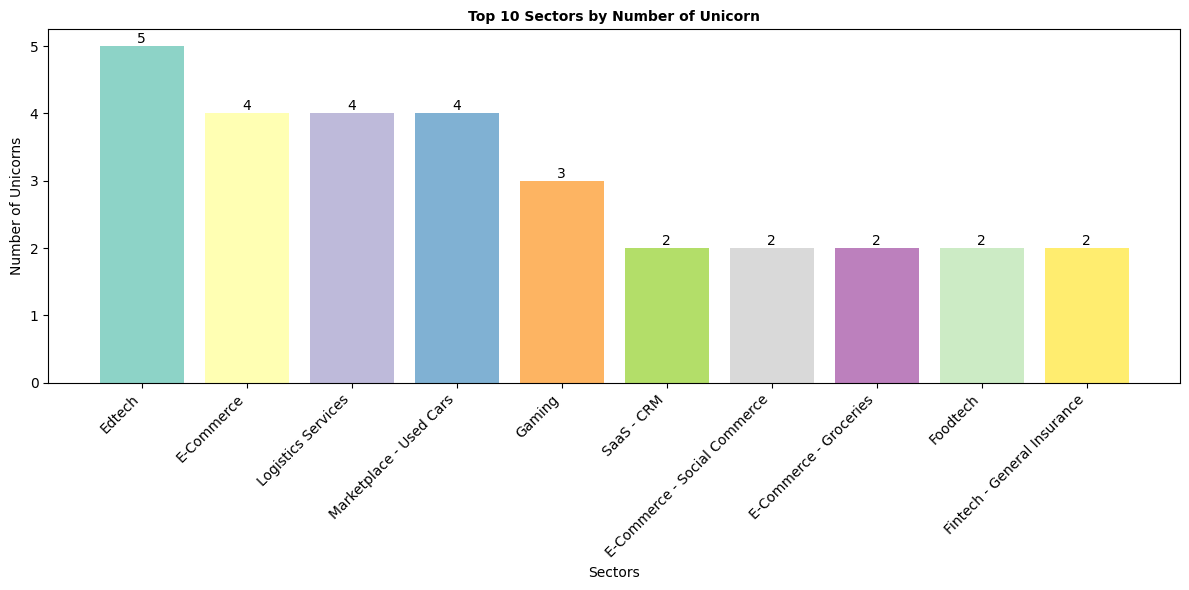

In [20]:
# Top sectors bar chart
plt.figure(figsize=(12,6))
top_sectors=sector_counts.head(10)
bars=plt.bar(range(len(top_sectors)),top_sectors.values,color=plt.cm.Set3(np.linspace(0,1,len(top_sectors))))
plt.title('Top 10 Sectors by Number of Unicorn',fontsize=10,fontweight='bold')
plt.xlabel('Sectors')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(top_sectors)),top_sectors.index,rotation=45,ha='right')
#Add value labels on bars
for bar,value in zip(bars,top_sectors.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),str(value),ha='center',va='bottom',fontsize=10)
plt.tight_layout()
plt.show()

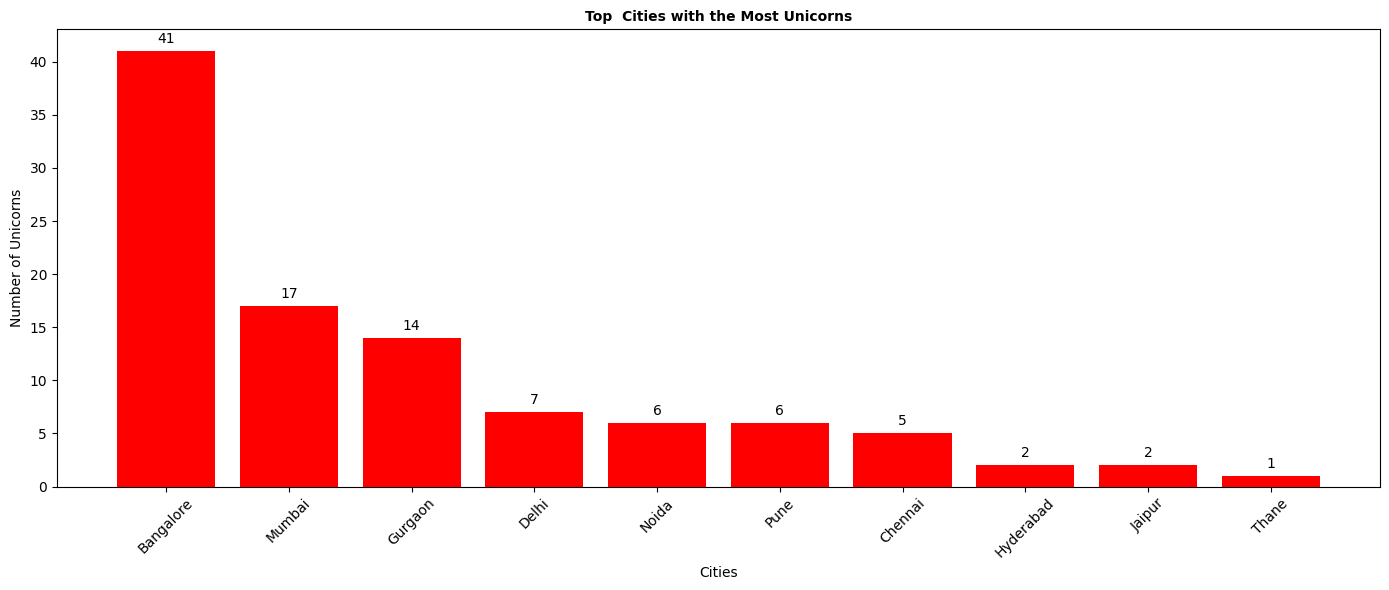

In [21]:
#Geographic Distribution

plt.figure(figsize=(14,6))
city_counts=df['Primary_City'].value_counts().head(10)
bars=plt.bar(city_counts.index,city_counts.values,color='red')
plt.title('Top  Cities with the Most Unicorns',fontsize=10,fontweight='bold')
plt.xlabel('Cities')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)

#Add value labels
for bar,value in zip(bars,city_counts.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.5,str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

In [22]:
#Create a summary table

city_summary=df.groupby('Primary_City').agg({
    'Valuation ($B)':['count','sum','mean'],
    'Entry_Year':['min','max']
}).round(2)
city_summary.columns=['Count','Total Valuation','Avg_Valuation','First_Entry','Last_Entry']
city_summary.head(10)

,Count,Total Valuation,Avg_Valuation,First_Entry,Last_Entry
Primary_City,,,,,
Bangalore,41,185.20,4.52,2011,2022
Chennai,5,12.20,2.44,2018,2022
Delhi,7,15.53,2.22,2014,2022
Goa,1,1.53,1.53,2022,2022
Gurgaon,14,37.94,2.71,2015,2022
Hyderabad,2,2.50,1.25,2020,2022
Jaipur,2,2.90,1.45,2021,2022
Mumbai,17,42.80,2.52,2018,2022
Noida,6,30.90,5.15,2015,2022


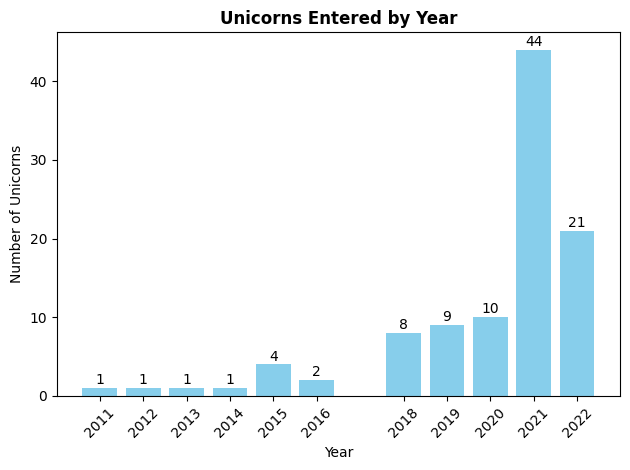

In [23]:
#Temporal Analysis

yearly_entries=df['Entry_Year'].value_counts().sort_index()
bars=plt.bar(yearly_entries.index,yearly_entries.values,color='skyblue')
plt.title('Unicorns Entered by Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index,rotation=45)

#Add value labels
for bar,value in zip(bars,yearly_entries.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

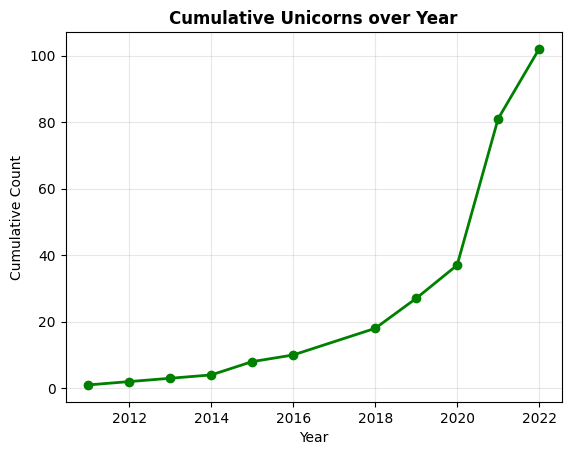

In [24]:
#Cumulative unicorns

cumulative=yearly_entries.cumsum()
plt.plot(cumulative.index,cumulative.values,marker='o',linewidth=2,color='green')
plt.title('Cumulative Unicorns over Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.grid(True,alpha=0.3)
plt.show()

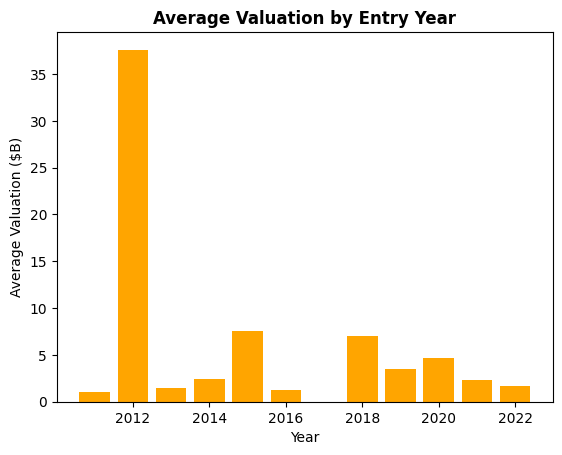

In [25]:
#Average valuation by year

avg_val_by_year=df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='orange')
plt.title('Average Valuation by Entry Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.show()

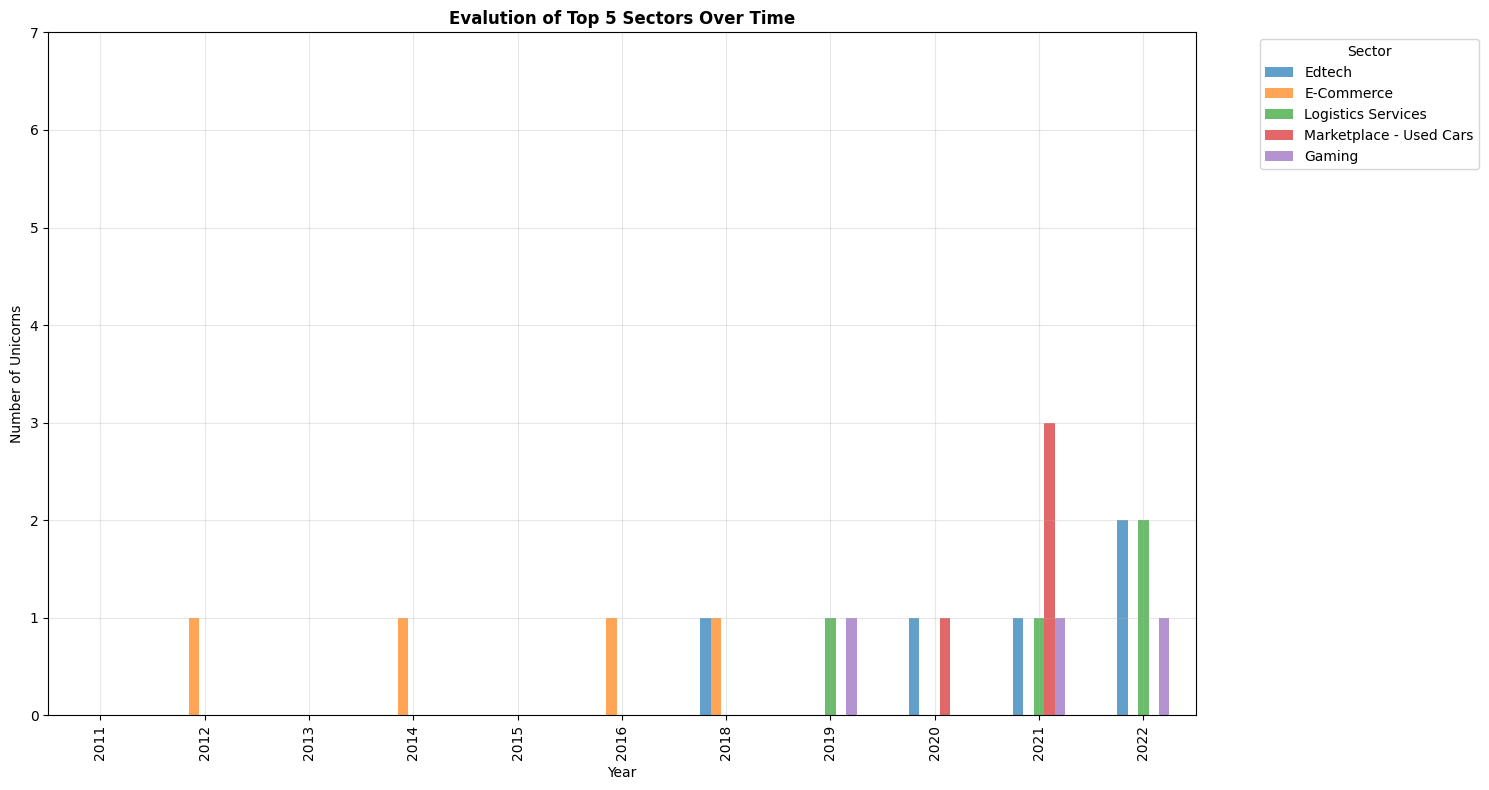

In [26]:
def display_k_sector_evalution(df,k):
  #Group by year sector,count occurrences
  sector_year=df.groupby(['Entry_Year','Sector']).size().unstack(fill_value=0)

  #Select top K sectors based on overall count
  top_k_sectors_name=df['Sector'].value_counts().head(k).index.tolist()
  sector_year=sector_year[top_k_sectors_name]
  plt.figure(figsize=(15,8))
  sector_year.plot(kind='bar',alpha=0.7,ax=plt.gca())
  plt.title(f'Evalution of Top {k} Sectors Over Time',fontweight='bold')
  plt.xlabel('Year')
  plt.ylabel('Number of Unicorns')
  plt.legend(title='Sector',bbox_to_anchor=(1.05,1),loc='upper left')
  plt.yticks(range(0,sector_year.values.max()+5))
  plt.grid(True,alpha=0.3)
  plt.tight_layout()
  plt.show()

#Call the function with K=5
display_k_sector_evalution(df,5)




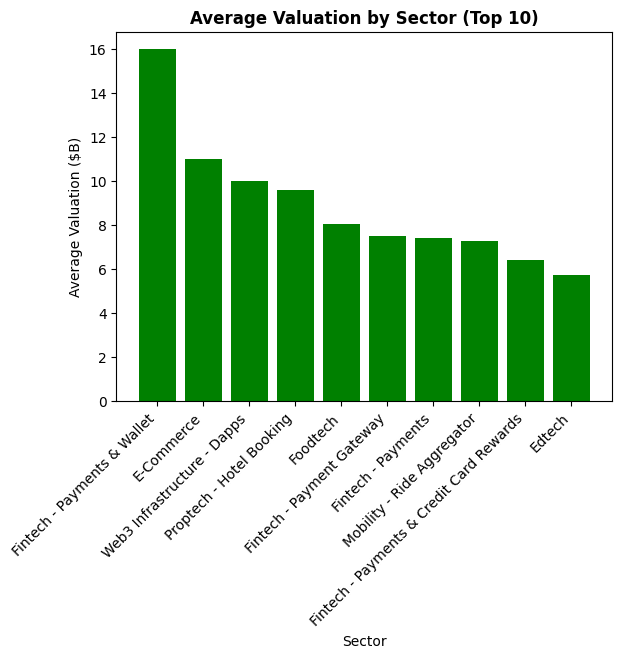

In [27]:
# Valuation vs Sector Analysis
avg_valuation=df.groupby('Sector')['Valuation ($B)'].mean()
avg_valuation=avg_valuation.sort_values(ascending=False).head(10)

bars=plt.bar(range(len(avg_valuation)),avg_valuation.values,color='green')
plt.title('Average Valuation by Sector (Top 10)',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Average Valuation ($B)')
plt.xticks(range(len(avg_valuation)),avg_valuation.index,rotation=45,ha='right')
plt.show()



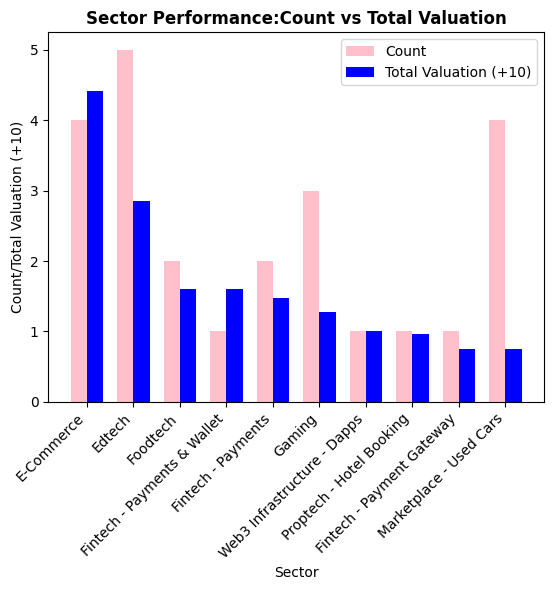

In [33]:
sector_summary=df.groupby('Sector').agg({
    'Valuation ($B)':['count','sum']
}).round(2)
sector_summary.columns=['counts','Total_Valuation']
sector_summary=sector_summary.sort_values('Total_Valuation',ascending=False).head(10)

x=np.arange(len(sector_summary))
width=0.35

plt.bar(x-width/2,sector_summary['counts'].values,width,label='Count',color='pink')
plt.bar(x+width/2,sector_summary['Total_Valuation']/10,width,label='Total Valuation (+10)',color='blue')
plt.title('Sector Performance:Count vs Total Valuation',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Count/Total Valuation (+10)')
plt.xticks(x,sector_summary.index,rotation=45,ha='right')
plt.legend()
plt.show()

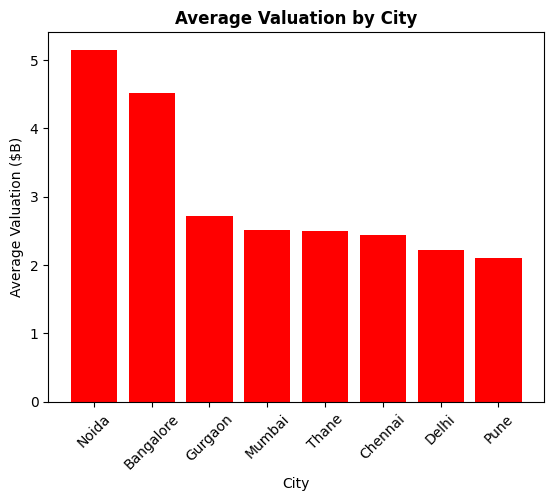

In [35]:
# Geographic vs Valuation Analysis

city_valuation=df.groupby('Primary_City')['Valuation ($B)'].mean()
city_valuation=city_valuation.sort_values(ascending=False).head(8)
bars=plt.bar(city_valuation.index,city_valuation.values,color='red')
plt.title('Average Valuation by City',fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Valuation ($B)')
plt.xticks(rotation=45)
plt.show()

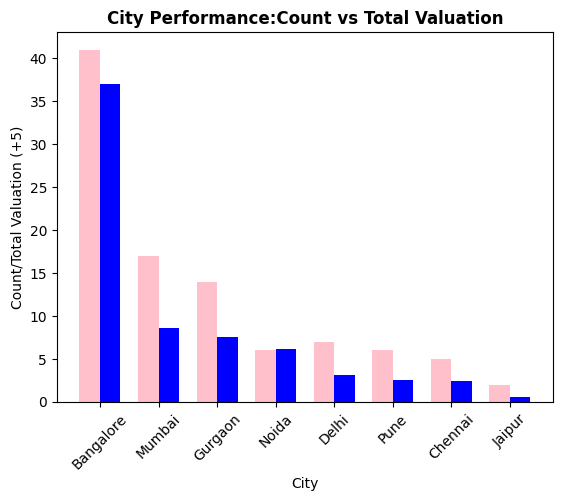

In [36]:
#City vs Count vs Total Valuation

city_summary=df.groupby('Primary_City').agg({
    'Valuation ($B)':['count','sum']
}).round(2)
city_summary.columns=['counts','Total_Valuation']
city_summary=city_summary.sort_values('Total_Valuation',ascending=False).head(8)
x=np.arange(len(city_summary))
width=0.35

plt.bar(x-width/2,city_summary['counts'],width,label='Count',color='pink')
plt.bar(x+width/2,city_summary['Total_Valuation']/5,width,label='Total Valuation (+5)',color='blue')
plt.title('City Performance:Count vs Total Valuation',fontweight='bold')
plt.xlabel('City')
plt.ylabel('Count/Total Valuation (+5)')
plt.xticks(x,city_summary.index,rotation=45)
plt.legend
plt.show()

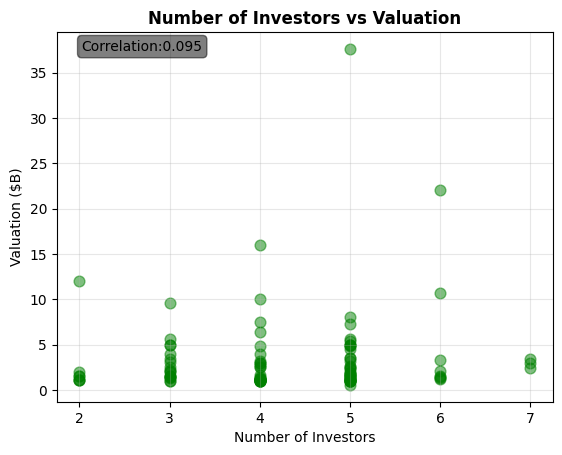

In [41]:
#Investor and Time-Based Analysis

plt.scatter(df['Investor_Count'],df['Valuation ($B)'],alpha=0.5,s=60,color='green')
plt.title('Number of Investors vs Valuation',fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Valuation ($B)')
plt.grid(True,alpha=0.3)

correlation=df['Investor_Count'].corr(df['Valuation ($B)'])
plt.text(0.05,0.95,f'Correlation:{correlation:.3f}',transform=plt.gca().transAxes,bbox=dict(boxstyle='round,pad=0.3',facecolor='black',alpha=0.5))
plt.show()

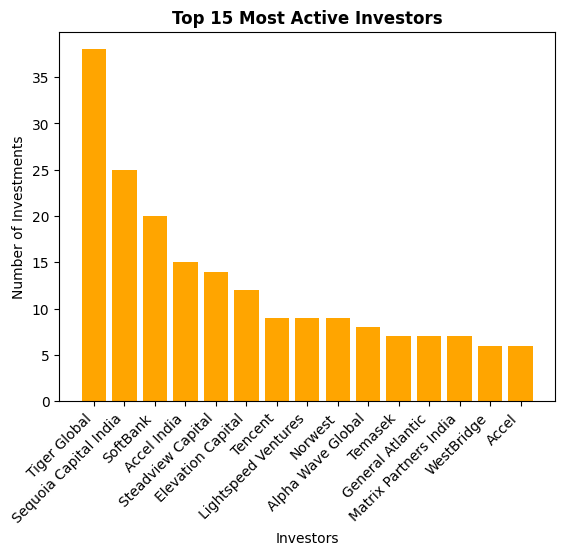

In [40]:
all_investors=[]
for investors in df['Select Investors'].dropna():
  all_investors.extend(inv.strip()for inv in investors.split(','))

investor_counts=pd.Series(all_investors).value_counts().head(15)
bars=plt.bar(range(len(investor_counts)),investor_counts.values,color='orange')
plt.title('Top 15 Most Active Investors',fontweight='bold')
plt.xlabel('Investors')
plt.ylabel('Number of Investments')
plt.xticks(range(len(investor_counts)),investor_counts.index,rotation=45,ha='right')
plt.show()

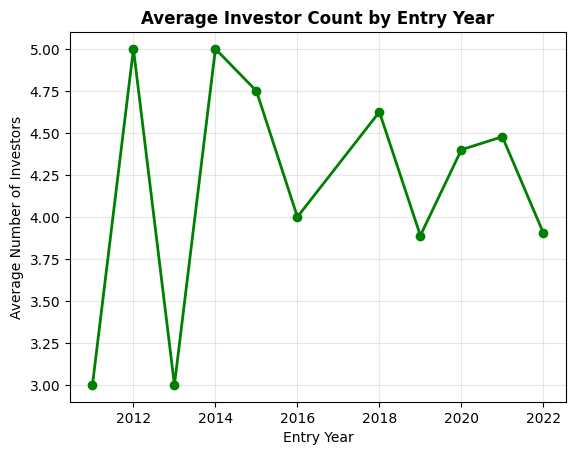

In [42]:
#Entry year vs Investor Count

year_investor=df.groupby('Entry_Year')['Investor_Count'].mean()
plt.plot(year_investor.index,year_investor.values,marker='o',linewidth=2,markersize=6,color='green')
plt.title('Average Investor Count by Entry Year',fontweight='bold')
plt.xlabel('Entry Year')
plt.ylabel('Average Number of Investors')
plt.grid(True,alpha=0.3)
plt.show()

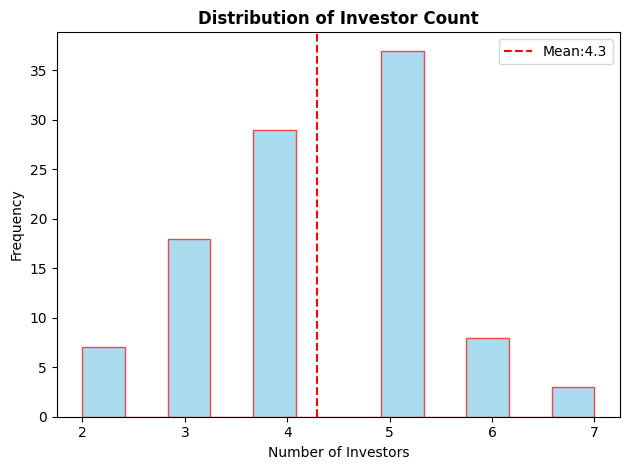

In [48]:
#Investor count distribution

plt.hist(df['Investor_Count'],bins=12,alpha=0.7,color='skyblue',edgecolor='red')
plt.title('Distribution of Investor Count',fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Frequency')
plt.axvline(df['Investor_Count'].mean(),color='red',linestyle='dashed',label=f'Mean:{df["Investor_Count"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()
